# The wind (part I): the beginning

In this post, I will provide a walkthrough about how to visualize the wind component, $U$ and $V$, using python. 

### Import the libraries

We begin with the standard procedure in python, importing the libraries. We import libraries such as numpy, xarray, pandas, pyplot, and cartopy. The last library, cartopy, is not included when we install Anaconda in the first place. Thus, we need to install it. The first step is open your terminal, I assume you are using linux, or in windows you can open the command prompt. Then, paste the command below to install cartopy, 

```conda install -c conda-forge cartopy```

or for more information please visit <a href="https://anaconda.org/conda-forge/cartopy" target="_blank">here</a>. Now we are ready to import all libraries we need.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from matplotlib import pyplot as plt

### The playground

The ```cartopy``` library integrated in ```pyplot``` can help us to plot geospatial data. For example, we want to plot the map of Indonesia as our study case.

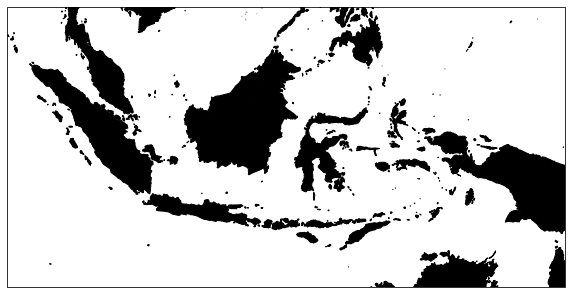

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='black', edgecolor='black')
ax.set_extent([93, 143, 10, -13])
plt.show()

As you can see, we use ```set_extent``` method to specify our domain of interest, $93W$ $143E$ $10N$ $-13S$.

### Download the data

The wind data uses from ERA5, the fifth generation European Center for Medium-Range Weather Forcasts (ECMWF) reanalysis for the global climate and weather, and it can be downloaded <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form" target="_blank">here</a>, before that you must sign in/up first. 

The data is a NetCDF file containing daily wind u and v speed components from January 2016 to December 2020. I named the file as ```jan2016-des2020.nc```.

### Explore the data

Now we take a look on the data, but first we need to open it using ```xarray``` module ```open_dataset```.

In [3]:
data_set = xr.open_dataset('jan2016-des2020.nc')
data_set

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 261, time: 1827)
Coordinates:
  * longitude  (longitude) float32 85.0 85.25 85.5 85.75 ... 149.5 149.8 150.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
  * time       (time) datetime64[ns] 2016-01-01T10:00:00 ... 2020-12-31T10:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-04-13 06:19:04 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

We could examine each Coordinates that consist ```longitude```, ```latitude```, and ```time```, also Data variables including ```u10``` and ```v10```.

In [4]:
data_set.longitude

<xarray.DataArray 'longitude' (longitude: 261)>
array([ 85.  ,  85.25,  85.5 , ..., 149.5 , 149.75, 150.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 85.0 85.25 85.5 85.75 ... 149.5 149.8 150.0
Attributes:
    units:      degrees_east
    long_name:  longitude

You can see that the longitude is a list of coordinate from $85^0$ East to $150^0$ East with interval $0.25^0$ that indicate the spatial data resolution.

In [5]:
data_set.latitude

<xarray.DataArray 'latitude' (latitude: 121)>
array([ 15.  ,  14.75,  14.5 ,  14.25,  14.  ,  13.75,  13.5 ,  13.25,  13.  ,
        12.75,  12.5 ,  12.25,  12.  ,  11.75,  11.5 ,  11.25,  11.  ,  10.75,
        10.5 ,  10.25,  10.  ,   9.75,   9.5 ,   9.25,   9.  ,   8.75,   8.5 ,
         8.25,   8.  ,   7.75,   7.5 ,   7.25,   7.  ,   6.75,   6.5 ,   6.25,
         6.  ,   5.75,   5.5 ,   5.25,   5.  ,   4.75,   4.5 ,   4.25,   4.  ,
         3.75,   3.5 ,   3.25,   3.  ,   2.75,   2.5 ,   2.25,   2.  ,   1.75,
         1.5 ,   1.25,   1.  ,   0.75,   0.5 ,   0.25,   0.  ,  -0.25,  -0.5 ,
        -0.75,  -1.  ,  -1.25,  -1.5 ,  -1.75,  -2.  ,  -2.25,  -2.5 ,  -2.75,
        -3.  ,  -3.25,  -3.5 ,  -3.75,  -4.  ,  -4.25,  -4.5 ,  -4.75,  -5.  ,
        -5.25,  -5.5 ,  -5.75,  -6.  ,  -6.25,  -6.5 ,  -6.75,  -7.  ,  -7.25,
        -7.5 ,  -7.75,  -8.  ,  -8.25,  -8.5 ,  -8.75,  -9.  ,  -9.25,  -9.5 ,
        -9.75, -10.  , -10.25, -10.5 , -10.75, -11.  , -11.25, -11.5 , -11.75,
       -12.  , -12.25, -12.5 , -12.75, -13.  , -13.25, -13.5 , -13.75, -14.  ,
       -14.25, -14.5 , -14.75, -15.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
Attributes:
    units:      degrees_north
    long_name:  latitude

Also the latitude with $0.25^0$ spatial resolution from $15^0$ North to $-15^0$ North.

In [6]:
data_set.time

<xarray.DataArray 'time' (time: 1827)>
array(['2016-01-01T10:00:00.000000000', '2016-01-02T10:00:00.000000000',
       '2016-01-03T10:00:00.000000000', ..., '2020-12-29T10:00:00.000000000',
       '2020-12-30T10:00:00.000000000', '2020-12-31T10:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T10:00:00 ... 2020-12-31T10:00:00
Attributes:
    long_name:  time

The data is a time series collected from 2016-01-01 to 2020-12-31 at 10 a.m.

In [7]:
data_set.u10

<xarray.DataArray 'u10' (time: 1827, latitude: 121, longitude: 261)>
[57698487 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 85.0 85.25 85.5 85.75 ... 149.5 149.8 150.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
  * time       (time) datetime64[ns] 2016-01-01T10:00:00 ... 2020-12-31T10:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

In [8]:
data_set.v10

<xarray.DataArray 'v10' (time: 1827, latitude: 121, longitude: 261)>
[57698487 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 85.0 85.25 85.5 85.75 ... 149.5 149.8 150.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
  * time       (time) datetime64[ns] 2016-01-01T10:00:00 ... 2020-12-31T10:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre V wind component

The two above data frames are 10 metres U and V wind component in $m/s$.

We also could plot the particular time series data at spcesific location. In this case below, we plot 10 metres U wind component from 2016-01-01 to 2017-01-01 at location of longitude $100^0$ East and latitude $5^0$ North.

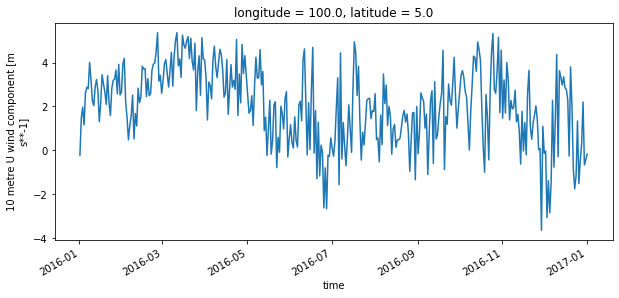

In [154]:
plt.figure(figsize=(10,4))
data_set.u10.sel(longitude=100, latitude=5, 
                 time=slice("2016-01-01", "2017-01-01")).plot();

Finally, the code below shows how to plot the wind component either U or V component at specified time. What you need to do is only change the component inside the ```data_set['wind_component']```. The value of ```wind_component``` is either ```u10``` or ```v10```.

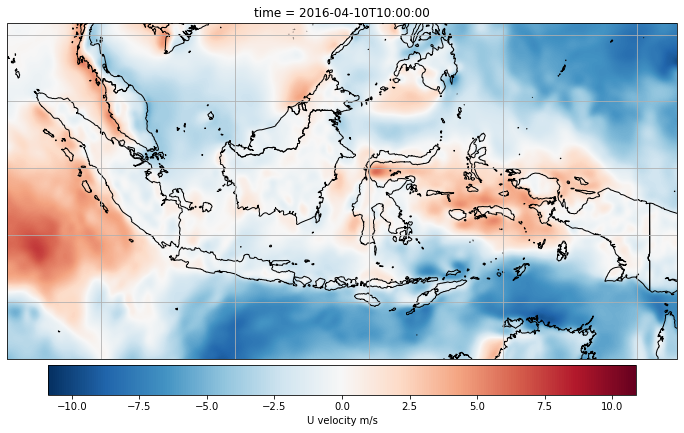

In [158]:
# select the wind component want to plot, i.e. 'u10' or 'v10'
wind_component = data_set['u10']
component = 'U' if wind_component.name == data_set['u10'].name else 'V'

# colorbar attributes
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither',
    'label': component + ' velocity m/s'
}

# choose the data at specified index time
i = 100
wind = data_set.u10.isel(time=100)

# figure set up
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax.set_extent([93, 143, 10, -13])
ax.gridlines()

# plot the data
wind.plot.imshow(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=True,
         cbar_kwargs=cbar_kwargs, interpolation='bicubic')

# save the figure
plt.savefig("map.png", bbox_inches='tight', dpi=150)

plt.show()